# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [221]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [222]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [223]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Tratamento dos dados

In [224]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [225]:
# Verificando Dados Nulos
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [226]:
le = LabelEncoder() # Usando encoder para transformar a variavel Gender em num
df['Gender_num'] = le.fit_transform(df['Gender']) # 1 Male 0 Female

In [227]:
# Dropando a Coluna Gender depois da transformacao e dropando a Customer Id por
# nao ser necessaria
df = df.drop(columns=['CustomerID', 'Gender'])

In [228]:
df.dtypes

,0
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64
Gender_num,int64


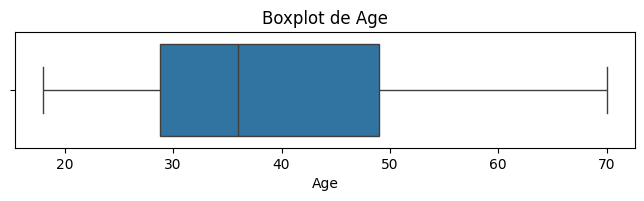

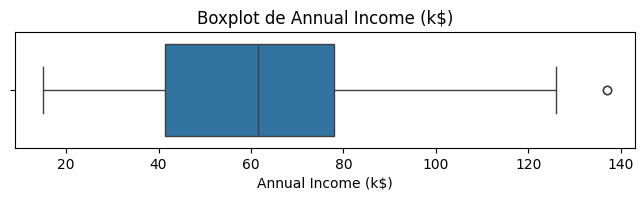

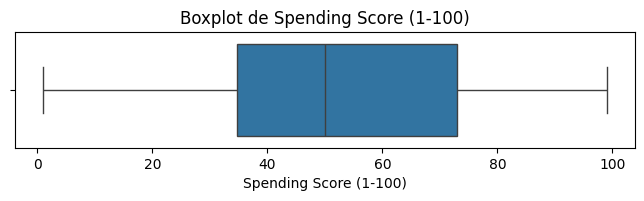

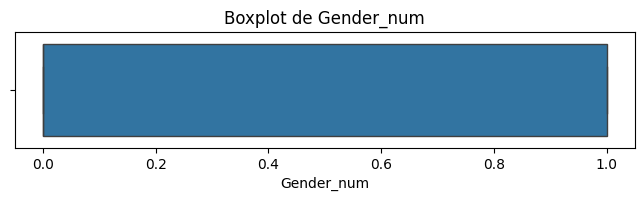

In [229]:
# Nao parece ter Outliers
colunas_numericas = df.select_dtypes(include='number').columns

for col in colunas_numericas:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [230]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_num
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [231]:
print(df['Gender_num'].value_counts(normalize=True) * 100)

Gender_num
0    56.0
1    44.0
Name: proportion, dtype: float64


In [232]:
df_padronizado = df.copy()
df_copia = df

In [233]:
# Padronizando para evitar que o modelo tenha um overfiting
scaler = StandardScaler()

df_padronizado = scaler.fit_transform(df)

In [234]:
df_padronizado

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

#K-menas

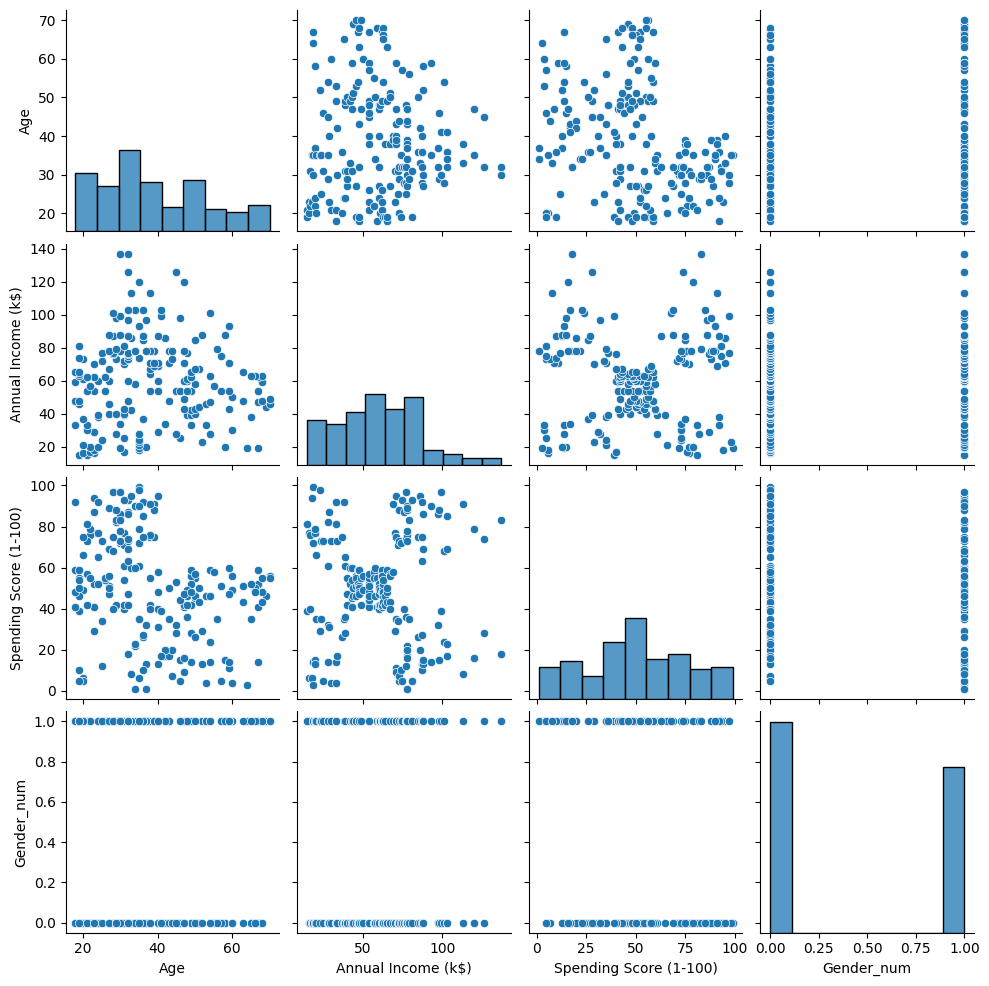

In [235]:
sns.pairplot(df) # Me parece ter dois Clusters

In [236]:
kmeans_cliente = KMeans (n_clusters=2, n_init=10, random_state=29)
kmeans_cliente.fit(df_padronizado)

KMeans(n_clusters=2, n_init=10, random_state=29)

In [237]:
labels = kmeans_cliente.labels_
labels

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [238]:
centroides = kmeans_cliente.cluster_centers_
centroides

array([[ 0.70892251, -0.00247545, -0.69939115,  0.05241761],
       [-0.75277339,  0.00262858,  0.74265245, -0.05565994]])

In [239]:
centroides_padronizados = kmeans_cliente.cluster_centers_

centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[48.72815534, 60.49514563, 32.18446602,  0.46601942],
       [28.36082474, 60.62886598, 69.32989691,  0.41237113]])

In [240]:
df['cluster'] = kmeans_cliente.labels_

print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_num  cluster
0   19                  15                      39           1        1
1   21                  15                      81           1        1
2   20                  16                       6           0        0
3   23                  16                      77           0        1
4   31                  17                      40           0        1


In [241]:
df_clusters = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'Gender_num': df['Gender_num'],
    'Age': df['Age'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)',
                  legend_title='Cluesters')
fig.show() # Podemos ver que nem todos que ganhao muito por ano gastao muito

In [242]:
df_clusters = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'Gender_num': df['Gender_num'],
    'Age': df['Age'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='Gender_num', y='Age', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Gender_num', yaxis_title='Age',
                  legend_title='Cluesters')
fig.show()

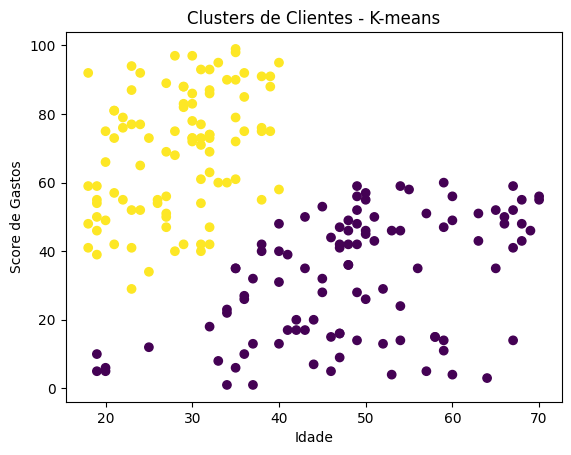

In [248]:
plt.scatter(
    df['Age'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis'
)
plt.xlabel('Idade')
plt.ylabel('Score de Gastos')
plt.title('Clusters de Clientes - K-means')
plt.show() # Pessoas mais jovens tendem a ter um score de gastos maior

In [243]:
resumo = df_copia.groupby('cluster').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median']
})
print(resumo) # Nosso cluster 1 tem uma media de idade bem mais baixa que o 0
# E gasta consideravelmente mais segundo a pontuacao do Score

               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
cluster                                                                      
0        48.728155   49.0          60.495146   60.0              32.184466   
1        28.360825   29.0          60.628866   62.0              69.329897   

                
        median  
cluster         
0         35.0  
1         73.0  


Analisando os gráficos e a média dos clusters, podemos observar que o cluster 1 é formado por pessoas mais jovens e com maior nível de gastos. Dessa forma, o marketing pode ser direcionado a esse perfil.

Podemos realizar eventos para atrair mais do nosso público, além de identificar melhor os produtos que eles mais consomem, de modo a aumentar ainda mais esse engajamento e maximizar nossa estratégia de lucros.